<a href="https://colab.research.google.com/github/rafaelMartins1922/kaggle-fraud-detection-challenge/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# comentário teste

In [ ]:
treino_transaction = pd.read_csv('/content/drive/MyDrive/teste/train_transaction.csv')
treino_identity = pd.read_csv('/content/drive/MyDrive/teste/train_identity.csv')

teste_transaction = pd.read_csv('/content/drive/MyDrive/teste/test_transaction.csv')
teste_identity = pd.read_csv('/content/drive/MyDrive/teste/test_identity.csv')

In [ ]:
treino = pd.merge(treino_transaction, treino_identity, on = 'TransactionID', how = 'left')
teste = pd.merge(teste_transaction,teste_identity, on = 'TransactionID', how = 'left')

In [ ]:
del treino_identity
del treino_transaction
del teste_identity
del teste_transaction

In [ ]:
treino.shape

(590540, 434)

In [ ]:
treino.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [ ]:
fraude = treino[treino["isFraud"] ==1]
veridico = treino[treino["isFraud"] ==0]

print("fraude: %i (%1.f%%)"%(len(fraude),float(len(fraude)/len(treino))*100.0))
print("veridico: %i (%1.f%%)"%(len(veridico),float(len(veridico)/len(treino))*100.0))
print("Total: %i"%len(treino))

fraude: 20663 (3%)
veridico: 569877 (97%)
Total: 590540


In [ ]:
teste.shape

(506691, 433)

In [ ]:
teste.columns = teste.columns.str.replace('^id-', 'id_', regex=True)

In [ ]:
teste.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
treino.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 434, dtype: int64

In [ ]:
treino.isnull().mean()[360:400]

V306     0.000020
V307     0.000020
V308     0.000020
V309     0.000020
V310     0.000020
V311     0.000020
V312     0.000020
V313     0.002149
V314     0.002149
V315     0.002149
V316     0.000020
V317     0.000020
V318     0.000020
V319     0.000020
V320     0.000020
V321     0.000020
V322     0.860550
V323     0.860550
V324     0.860550
V325     0.860550
V326     0.860550
V327     0.860550
V328     0.860550
V329     0.860550
V330     0.860550
V331     0.860550
V332     0.860550
V333     0.860550
V334     0.860550
V335     0.860550
V336     0.860550
V337     0.860550
V338     0.860550
V339     0.860550
id_01    0.755761
id_02    0.761452
id_03    0.887689
id_04    0.887689
id_05    0.768238
id_06    0.768238
dtype: float64

In [ ]:
treino.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [ ]:
treino.describe(include=["O"])

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,590540,588963,588969,496084,137291,319440,319440,319440,309096,240058,...,77565,140282,73289,77805,140985,140985,140985,140985,140810,118666
unique,5,4,4,59,60,2,2,2,3,2,...,75,130,260,4,2,2,2,2,2,1786
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,...,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
freq,439670,384767,439938,228355,57147,319415,285468,251731,196405,132491,...,21155,22000,16874,60011,77814,134066,110452,73922,85165,47722


In [ ]:
treino.ProductCD.value_counts()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

In [ ]:
treino.groupby("ProductCD").isFraud.value_counts()

ProductCD  isFraud
C          0           60511
           1            8008
H          0           31450
           1            1574
R          0           36273
           1            1426
S          0           10942
           1             686
W          0          430701
           1            8969
Name: isFraud, dtype: int64

In [ ]:
treino[["ProductCD","isFraud"]].groupby(["ProductCD"]).mean()

,isFraud
ProductCD,
C,0.116873
H,0.047662
R,0.037826
S,0.058996
W,0.020399


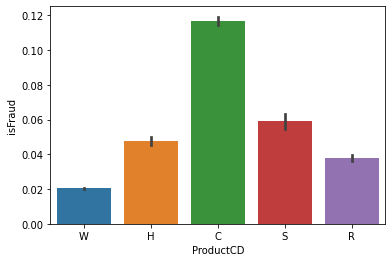

In [ ]:
sns.barplot(x="ProductCD", y="isFraud",data=treino)

In [ ]:
treino.groupby("DeviceType").isFraud.value_counts()

DeviceType  isFraud
desktop     0          79611
            1           5554
mobile      0          49988
            1           5657
Name: isFraud, dtype: int64

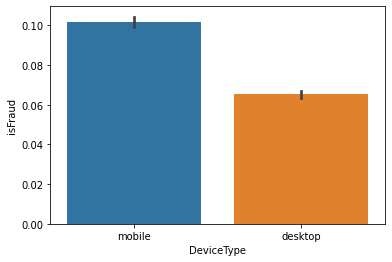

In [ ]:
sns.barplot(x="DeviceType", y="isFraud",data=treino)

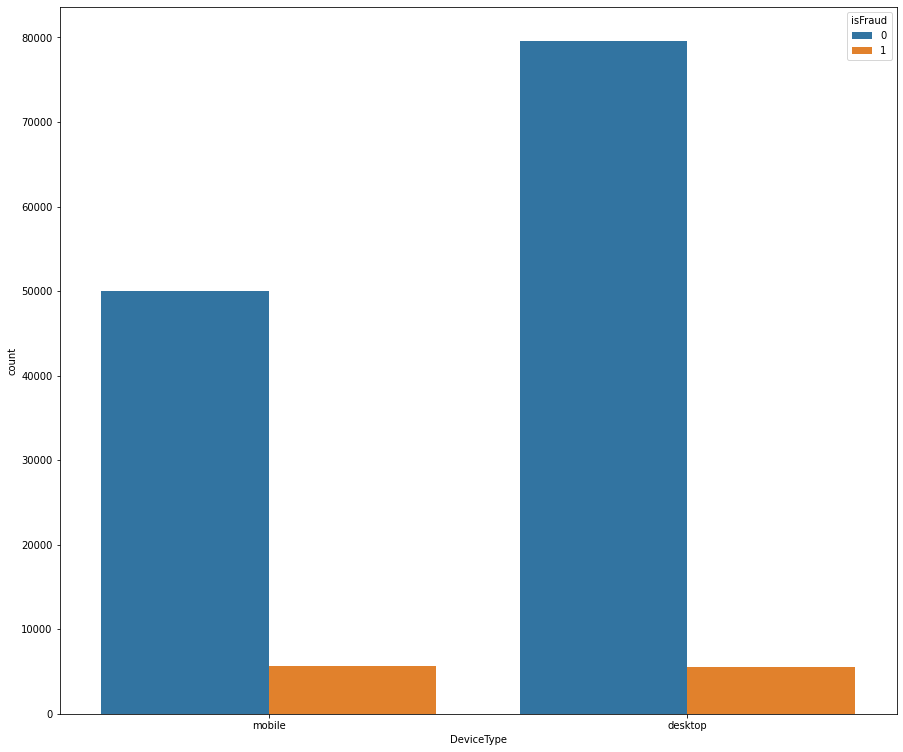

In [ ]:
fig, axes = plt.subplots(0, 1, figsize=(15, 13))

fig.tight_layout(pad=15.0)
        
sns.countplot(x='DeviceType',hue='isFraud', data=treino)

In [ ]:
cardf = ['card1','card2','card3','card4','card5','card6']
card_features = ['card'+str(i) for i in range(1,7) if "card"+str(i) in cardf]
for f in card_features:
    print('\n',"-"*10,f,"-"*10,'\n')
    print(treino[f].describe())
    if(treino[f].dtype != object):
        len_unique_cat = len(np.unique(treino[f]))
        print("\n{} feature has {} unique categories\n".format(f, len_unique_cat))


 ---------- card1 ---------- 

count    590540.000000
mean       9898.734658
std        4901.170153
min        1000.000000
25%        6019.000000
50%        9678.000000
75%       14184.000000
max       18396.000000
Name: card1, dtype: float64

card1 feature has 13553 unique categories


 ---------- card2 ---------- 

count    581607.000000
mean        362.555488
std         157.793246
min         100.000000
25%         214.000000
50%         361.000000
75%         512.000000
max         600.000000
Name: card2, dtype: float64

card2 feature has 501 unique categories


 ---------- card3 ---------- 

count    588975.000000
mean        153.194925
std          11.336444
min         100.000000
25%         150.000000
50%         150.000000
75%         150.000000
max         231.000000
Name: card3, dtype: float64

card3 feature has 115 unique categories


 ---------- card4 ---------- 

count     588963
unique         4
top         visa
freq      384767
Name: card4, dtype: object

 ---------- 

In [ ]:
treino.groupby("card4").isFraud.value_counts()

card4             isFraud
american express  0            8089
                  1             239
discover          0            6137
                  1             514
mastercard        0          182721
                  1            6496
visa              0          371394
                  1           13373
Name: isFraud, dtype: int64

In [ ]:
treino.groupby("card6").isFraud.value_counts()

card6            isFraud
charge card      0              15
credit           0          139036
                 1            9950
debit            0          429264
                 1           10674
debit or credit  0              30
Name: isFraud, dtype: int64

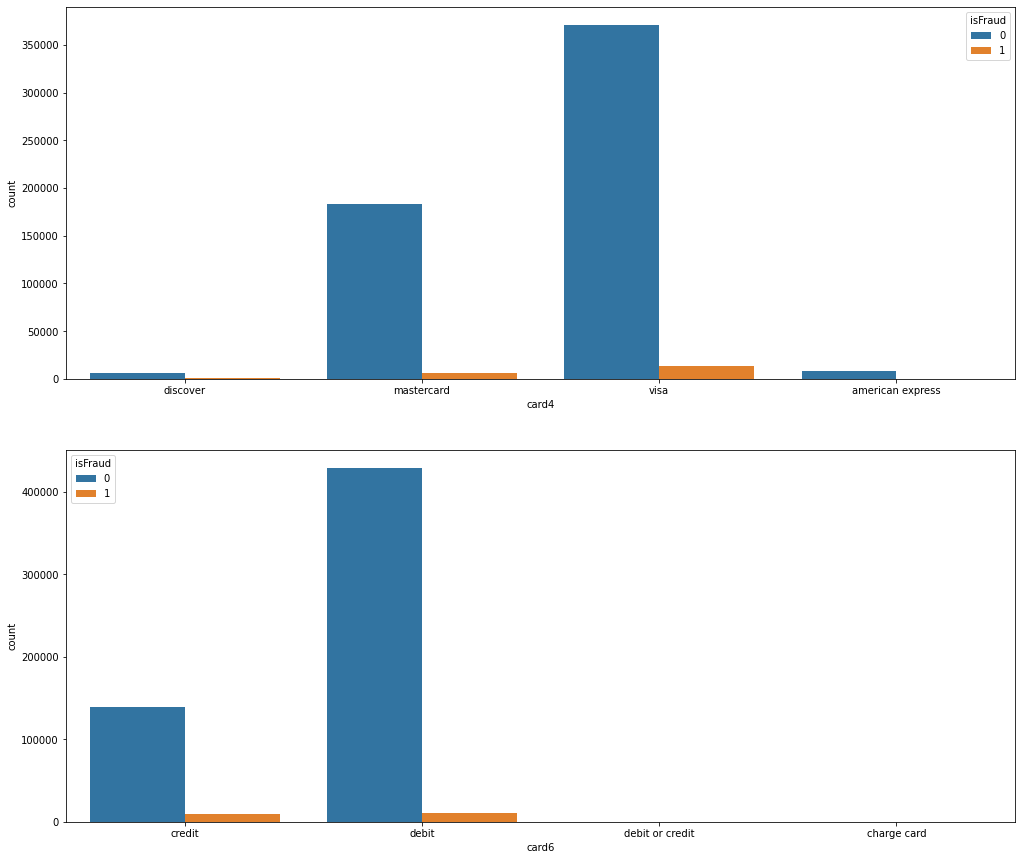

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 13))

fig.tight_layout(pad=5.0)
idx = 0

for i in range(2):
    
        if(idx==len(['card4','card6'])):
            break
            
        f = ['card4','card6'][idx]
        idx+=1
        
        sns.countplot(x=f,hue='isFraud', data=treino, ax=axes[i])

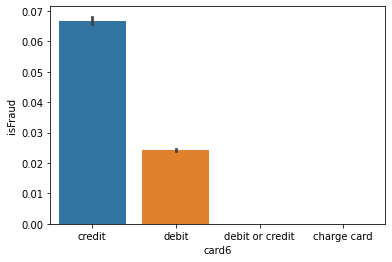

In [ ]:
sns.barplot(x=f"card6", y="isFraud",data=treino)

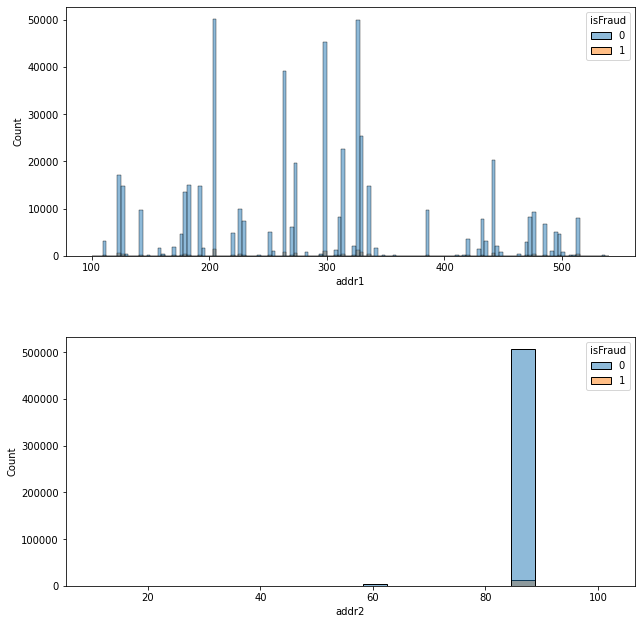

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
fig.tight_layout(pad=6.0)
idx = 0

for i in range(2):    
    
        if(idx==len(['addr1','addr2'])):
            break
    
        f = ['addr1','addr2'][idx]
        idx+=1
            
        sns.histplot(x=f,hue='isFraud', data=treino, ax=axes[i],)

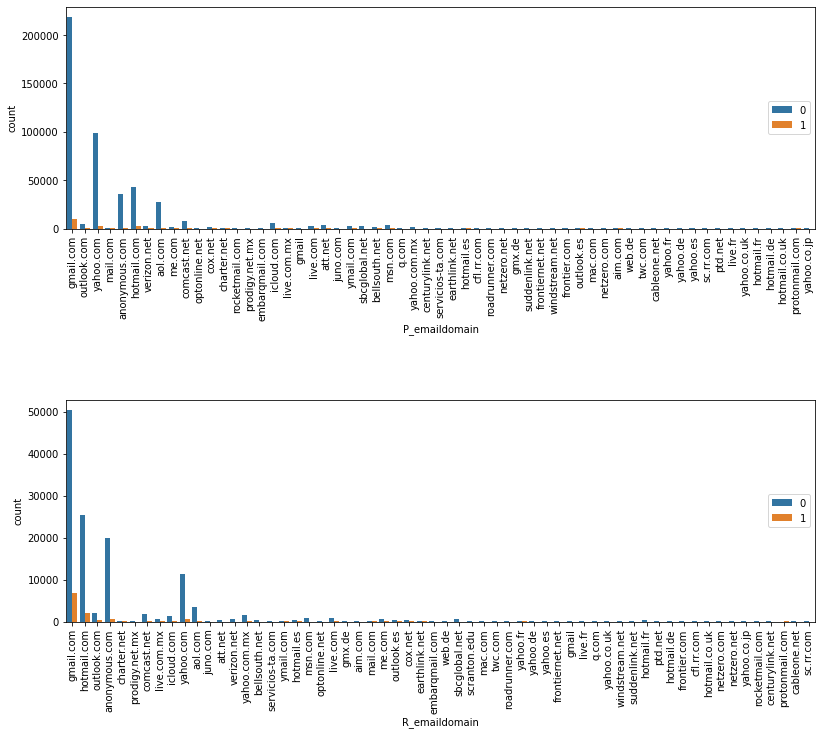

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 13))

fig.tight_layout(pad=15.0)
idx = 0

for i in range(2):
    
        if(idx==len(['P_emaildomain', 'R_emaildomain'])):
            break
            
        f = ['P_emaildomain', 'R_emaildomain'][idx]
        idx+=1
        
        sns.countplot(x=f,hue='isFraud', data=treino, ax=axes[i])
        
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='center')
        axes[i].legend(loc=7)

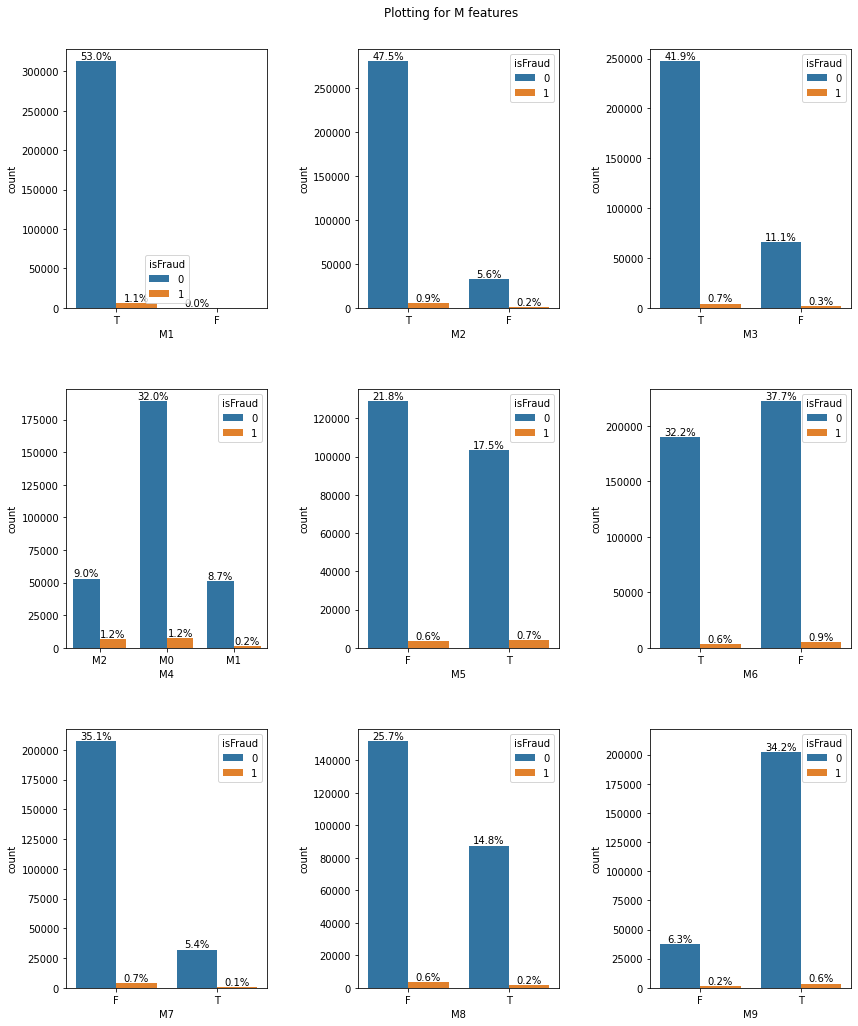

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(13, 15))

fig.tight_layout(pad=6.0)
fig.suptitle('Plotting for M features')
K = 0

plt.margins(0.05, 0.1)

for i in range(3):
    for j in range(3):
        
        if(K==len(['M1','M2','M3','M4','M5','M6','M7','M8','M9'])):
            break
        
        f = ['M1','M2','M3','M4','M5','M6','M7','M8','M9'][K]
        K+=1
        
        sns.countplot(x=f,hue='isFraud', data=treino, ax=axes[i,j])
        
        for p in axes[i,j].patches:
              x=p.get_bbox().get_points()[:,0]
              y=p.get_bbox().get_points()[1,1]
              axes[i,j].annotate('{:.1f}%'.format(100.*y/len(treino)), (x.mean(), y), 
                      ha='center', va='bottom') 